In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

Steps involved :
1. Understand the data
2. Preprocess the data
3. Create a data
4. Fit the model
5. Evaluate
6. Adjust different hyperparameters and improve the model.
7. Repeat until satisfied


In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", 'r')
zip_ref.extractall()
zip_ref.close()

--2023-08-13 23:21:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.5MB/s    in 23s     

2023-08-13 23:22:12 (21.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
import os

#Walkthrough the 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 

In [4]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [5]:
#get the classnames from the dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:

# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


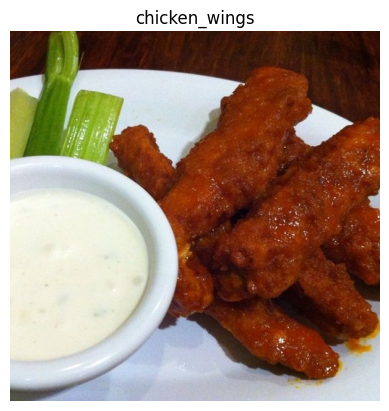

In [7]:
#view any random image from the dataset
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

Preprocessing the data

In [8]:
img

array([[[ 45,  14,   0],
        [ 50,  19,   1],
        [ 53,  21,   6],
        ...,
        [ 51,  18,  11],
        [ 46,  16,   8],
        [ 40,  10,   2]],

       [[ 46,  15,   0],
        [ 52,  21,   3],
        [ 57,  25,  10],
        ...,
        [ 46,  13,   6],
        [ 44,  14,   6],
        [ 41,  11,   3]],

       [[ 50,  17,   2],
        [ 58,  25,  10],
        [ 63,  30,  15],
        ...,
        [ 43,  10,   3],
        [ 42,  12,   4],
        [ 42,  12,   4]],

       ...,

       [[ 84,  82,  69],
        [ 83,  81,  68],
        [ 81,  82,  68],
        ...,
        [214, 227, 235],
        [215, 225, 234],
        [215, 225, 234]],

       [[ 87,  85,  73],
        [ 83,  81,  69],
        [ 80,  80,  68],
        ...,
        [213, 226, 235],
        [215, 225, 235],
        [216, 226, 236]],

       [[ 89,  87,  75],
        [ 84,  82,  70],
        [ 81,  81,  69],
        ...,
        [211, 224, 233],
        [214, 224, 234],
        [216, 226, 236]]

In [9]:
# check the shape for width, height and color channels
img.shape

(512, 512, 3)

In [10]:
# get all pixel values between 0 and 1
img/255.

array([[[0.17647059, 0.05490196, 0.        ],
        [0.19607843, 0.0745098 , 0.00392157],
        [0.20784314, 0.08235294, 0.02352941],
        ...,
        [0.2       , 0.07058824, 0.04313725],
        [0.18039216, 0.0627451 , 0.03137255],
        [0.15686275, 0.03921569, 0.00784314]],

       [[0.18039216, 0.05882353, 0.        ],
        [0.20392157, 0.08235294, 0.01176471],
        [0.22352941, 0.09803922, 0.03921569],
        ...,
        [0.18039216, 0.05098039, 0.02352941],
        [0.17254902, 0.05490196, 0.02352941],
        [0.16078431, 0.04313725, 0.01176471]],

       [[0.19607843, 0.06666667, 0.00784314],
        [0.22745098, 0.09803922, 0.03921569],
        [0.24705882, 0.11764706, 0.05882353],
        ...,
        [0.16862745, 0.03921569, 0.01176471],
        [0.16470588, 0.04705882, 0.01568627],
        [0.16470588, 0.04705882, 0.01568627]],

       ...,

       [[0.32941176, 0.32156863, 0.27058824],
        [0.3254902 , 0.31764706, 0.26666667],
        [0.31764706, 0

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#rescale
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

#Load data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_1 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224,3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax') #since we have 10 classes, and use softmax since we have more than 2 classes
])

model_1.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [13]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 42s 129ms/step - loss: 2.2631 - accuracy: 0.1471 - val_loss: 2.1756 - val_accuracy: 0.2132
Epoch 2/5
235/235 [==============================] - 28s 117ms/step - loss: 2.0190 - accuracy: 0.2801 - val_loss: 2.1070 - val_accuracy: 0.2480
Epoch 3/5
235/235 [==============================] - 27s 117ms/step - loss: 1.6122 - accuracy: 0.4471 - val_loss: 2.1348 - val_accuracy: 0.2556
Epoch 4/5
235/235 [==============================] - 28s 117ms/step - loss: 0.9925 - accuracy: 0.6712 - val_loss: 2.7142 - val_accuracy: 0.2520
Epoch 5/5
235/235 [==============================] - 28s 118ms/step - loss: 0.4740 - accuracy: 0.8503 - val_loss: 3.8088 - val_accuracy: 0.2328


In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [15]:
pd.DataFrame(history_1.history)

,loss,accuracy,val_loss,val_accuracy
0,2.263072,0.147067,2.175608,0.2132
1,2.018964,0.280133,2.106953,0.2480
2,1.612230,0.447067,2.134828,0.2556
3,0.992525,0.671200,2.714227,0.2520
4,0.474037,0.850267,3.808768,0.2328


In [16]:
def plot_loss_curve(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label='validation_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label ='validation_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

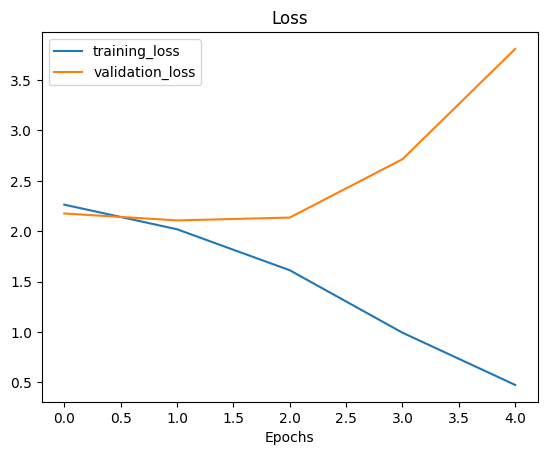

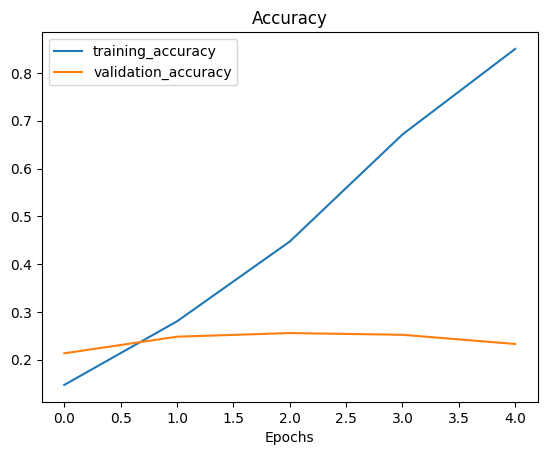

In [17]:
plot_loss_curve(history_1)

In [18]:
# the model doesn't work well, the loss curve is supposed to go down, and accuracy go up. Its overfitting itself and performs poorly on the test dataset
model_1.evaluate(test_data)

79/79 [==============================] - 7s 89ms/step - loss: 3.8088 - accuracy: 0.2328


[3.8087668418884277, 0.23280000686645508]

In [19]:
model_2 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [20]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data= test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 32s 132ms/step - loss: 2.1782 - accuracy: 0.2032 - val_loss: 2.0557 - val_accuracy: 0.2392
Epoch 2/5
235/235 [==============================] - 26s 111ms/step - loss: 1.8017 - accuracy: 0.3837 - val_loss: 1.9981 - val_accuracy: 0.2916
Epoch 3/5
235/235 [==============================] - 31s 131ms/step - loss: 1.2572 - accuracy: 0.5908 - val_loss: 2.1454 - val_accuracy: 0.2900
Epoch 4/5
235/235 [==============================] - 26s 112ms/step - loss: 0.6696 - accuracy: 0.7953 - val_loss: 2.6825 - val_accuracy: 0.2708
Epoch 5/5
235/235 [==============================] - 26s 111ms/step - loss: 0.2914 - accuracy: 0.9264 - val_loss: 3.3165 - val_accuracy: 0.2584


In [21]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [22]:
pd.DataFrame(history_2.history)

,loss,accuracy,val_loss,val_accuracy
0,2.178232,0.203200,2.055726,0.2392
1,1.801708,0.383733,1.998109,0.2916
2,1.257228,0.590800,2.145412,0.2900
3,0.669586,0.795333,2.682532,0.2708
4,0.291411,0.926400,3.316521,0.2584


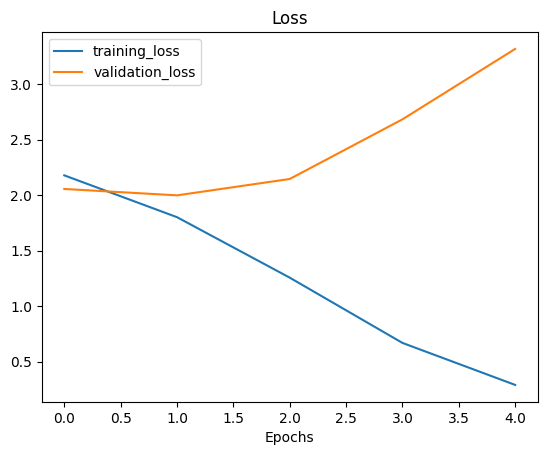

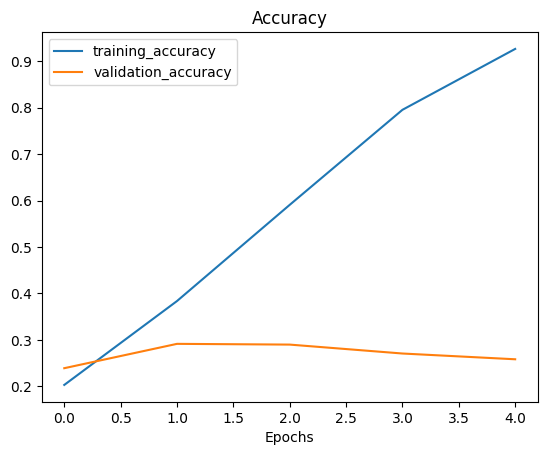

In [23]:
plot_loss_curve(history_2)

In [24]:
# still not that great
model_2.evaluate(test_data)

79/79 [==============================] - 7s 83ms/step - loss: 3.3165 - accuracy: 0.2584


[3.316521406173706, 0.25839999318122864]

Try augmenting the datasets to check and see if that improves the accuracy

In [25]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [26]:
model_3 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [27]:
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data= test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 100s 417ms/step - loss: 2.2091 - accuracy: 0.1925 - val_loss: 2.0643 - val_accuracy: 0.2508
Epoch 2/5
235/235 [==============================] - 98s 417ms/step - loss: 2.1012 - accuracy: 0.2511 - val_loss: 1.9685 - val_accuracy: 0.2928
Epoch 3/5
235/235 [==============================] - 99s 422ms/step - loss: 2.0545 - accuracy: 0.2785 - val_loss: 1.9233 - val_accuracy: 0.3332
Epoch 4/5
235/235 [==============================] - 98s 418ms/step - loss: 2.0004 - accuracy: 0.3055 - val_loss: 1.8161 - val_accuracy: 0.3776
Epoch 5/5
235/235 [==============================] - 97s 415ms/step - loss: 1.9658 - accuracy: 0.3183 - val_loss: 1.8468 - val_accuracy: 0.3776


In [28]:
pd.DataFrame(history_3.history)

,loss,accuracy,val_loss,val_accuracy
0,2.209057,0.192533,2.064258,0.2508
1,2.101218,0.251067,1.968496,0.2928
2,2.054549,0.278533,1.923345,0.3332
3,2.000383,0.305467,1.816063,0.3776
4,1.965767,0.318267,1.846787,0.3776


In [29]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 29160)             0         
                                                                 
 dense_2 (Dense)             (None, 10)               

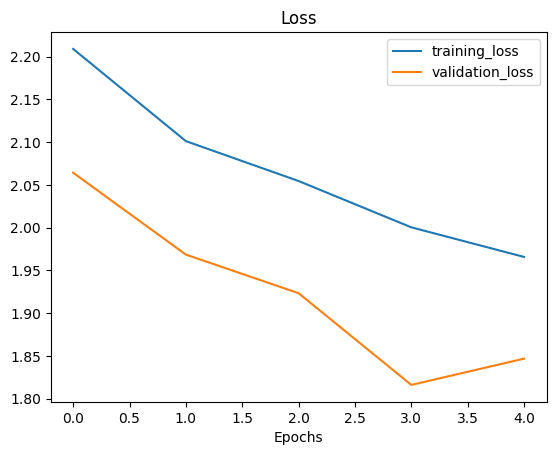

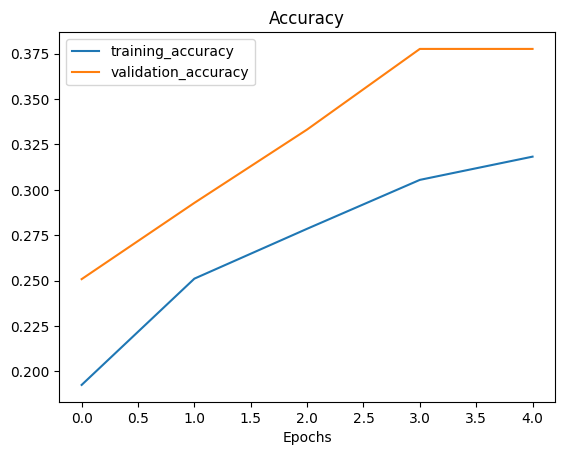

In [30]:
plot_loss_curve(history_3)

In [31]:
model_3.evaluate(test_data)

79/79 [==============================] - 6s 78ms/step - loss: 1.8468 - accuracy: 0.3776


[1.8467859029769897, 0.3776000142097473]

In [41]:
model_4 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_4.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [42]:
history_4 = model_4.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data= test_data,
                        validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 101s 422ms/step - loss: 2.2475 - accuracy: 0.1404 - val_loss: 2.1209 - val_accuracy: 0.2224
Epoch 2/10
235/235 [==============================] - 101s 429ms/step - loss: 2.1220 - accuracy: 0.2353 - val_loss: 1.9843 - val_accuracy: 0.2912
Epoch 3/10
235/235 [==============================] - 100s 425ms/step - loss: 2.0555 - accuracy: 0.2660 - val_loss: 1.9426 - val_accuracy: 0.3208
Epoch 4/10
235/235 [==============================] - 104s 443ms/step - loss: 1.9950 - accuracy: 0.3016 - val_loss: 1.8302 - val_accuracy: 0.3716
Epoch 5/10
235/235 [==============================] - 99s 423ms/step - loss: 1.9580 - accuracy: 0.3189 - val_loss: 1.8075 - val_accuracy: 0.3808
Epoch 6/10
235/235 [==============================] - 100s 424ms/step - loss: 1.9188 - accuracy: 0.3375 - val_loss: 1.7955 - val_accuracy: 0.3912
Epoch 7/10
235/235 [==============================] - 100s 424ms/step - loss: 1.8899 - accuracy: 0.3473 - val_loss: 1.7638 - 

In [43]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 52, 52, 10)        2890      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 10)      

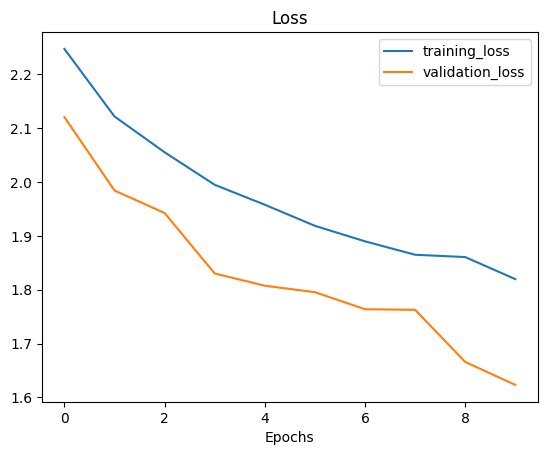

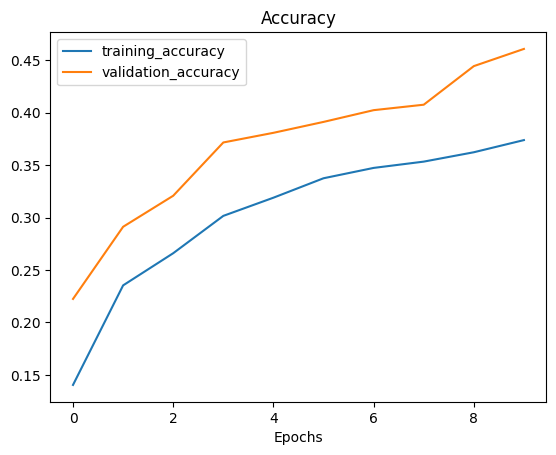

In [44]:
plot_loss_curve(history_4)

In [45]:
pd.DataFrame(history_4.history)

,loss,accuracy,val_loss,val_accuracy
0,2.247465,0.140400,2.120864,0.2224
1,2.121959,0.235333,1.984345,0.2912
2,2.055455,0.266000,1.942587,0.3208
3,1.994993,0.301600,1.830200,0.3716
4,1.957971,0.318933,1.807495,0.3808
5,1.918768,0.337467,1.795458,0.3912
6,1.889946,0.347333,1.763774,0.4024
7,1.865000,0.353333,1.762681,0.4076
8,1.860698,0.362267,1.665849,0.4444
9,1.819737,0.373867,1.623126,0.4608


In [46]:
model_4.evaluate(test_data)

79/79 [==============================] - 7s 83ms/step - loss: 1.6231 - accuracy: 0.4608


[1.623125433921814, 0.4607999920845032]

Testing customized data

In [47]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [48]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [49]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [50]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 28ms/step


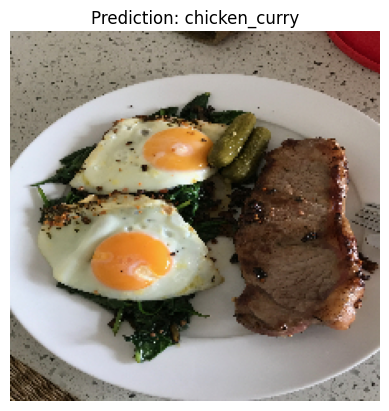

In [54]:
pred_and_plot(model=model_4,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 21ms/step


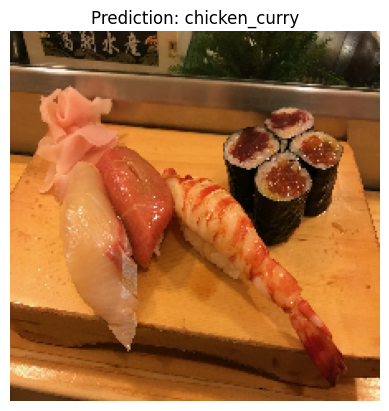

In [55]:
pred_and_plot(model_4, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 56ms/step


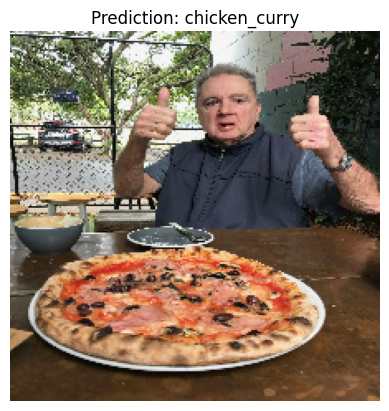

In [57]:
pred_and_plot(model_4, "03-pizza-dad.jpeg", class_names)


1/1 [==============================] - 0s 138ms/step


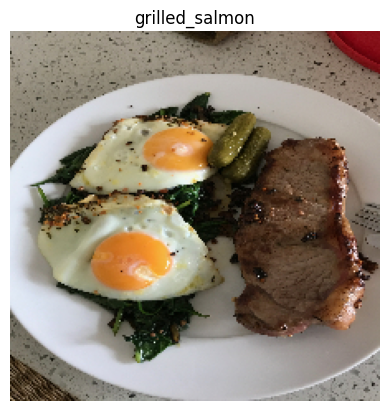

In [59]:
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_4.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [60]:
# Check the output of the predict function
pred = model_4.predict(tf.expand_dims(img, axis=0))
pred

1/1 [==============================] - 0s 35ms/step


array([[0.06043859, 0.02074645, 0.12602583, 0.3213604 , 0.08784418,
        0.02469568, 0.01820158, 0.17249392, 0.10673931, 0.06145404]],
      dtype=float32)

In [61]:
class_names[pred.argmax()]

'grilled_salmon'

In [62]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 18ms/step


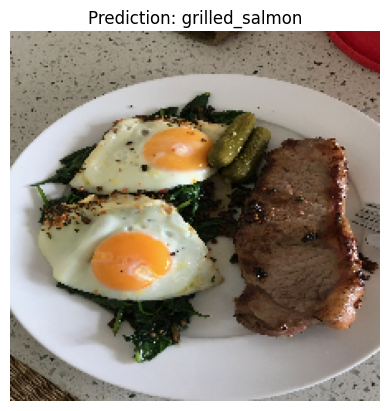

In [63]:
pred_and_plot(model_4, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 19ms/step


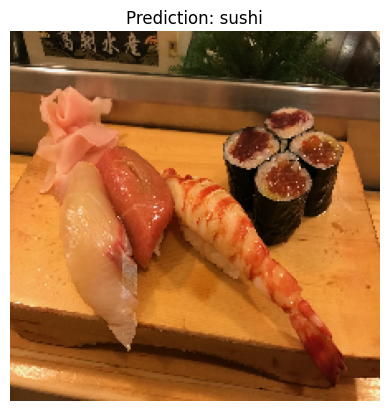

In [64]:
pred_and_plot(model_4, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 23ms/step


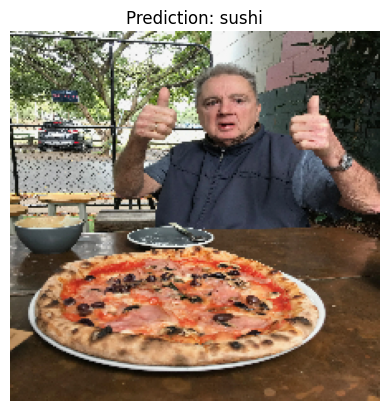

In [65]:
pred_and_plot(model_4, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 79ms/step


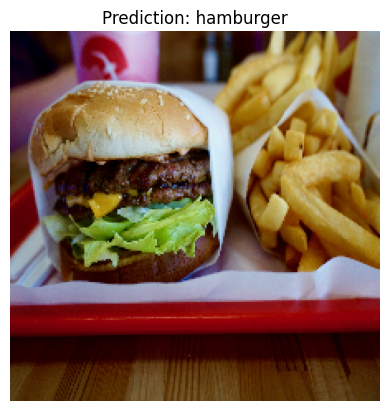

In [66]:
pred_and_plot(model_4, "03-hamburger.jpeg", class_names)